In [1]:
import pandas as pd
prices = pd.read_csv('prices.csv')
prices.head()

,Unnamed: 0,time,low,high,open,close,volume,date
0,0,1516775760,10749.99,10776.00,10749.99,10775.99,9.810152,2018-01-24 07:36:00
1,1,1516775820,10776.00,10830.00,10776.00,10830.00,9.378649,2018-01-24 07:37:00
2,2,1516775880,10830.00,10850.00,10830.00,10850.00,6.672663,2018-01-24 07:38:00
3,3,1516775940,10849.99,10917.00,10849.99,10900.00,7.877625,2018-01-24 07:39:00
4,4,1516776000,10875.51,10919.99,10899.50,10919.99,7.519954,2018-01-24 07:40:00


In [2]:
prices.corr()

,Unnamed: 0,time,low,high,open,close,volume
Unnamed: 0,1.000000,1.000000,0.343219,0.331378,0.332113,0.332673,-0.064729
time,1.000000,1.000000,0.343219,0.331378,0.332113,0.332673,-0.064729
low,0.343219,0.343219,1.000000,0.983481,0.988210,0.988546,0.162327
high,0.331378,0.331378,0.983481,1.000000,0.989320,0.991050,0.231575
open,0.332113,0.332113,0.988210,0.989320,1.000000,0.976236,0.189695
close,0.332673,0.332673,0.988546,0.991050,0.976236,1.000000,0.208332
volume,-0.064729,-0.064729,0.162327,0.231575,0.189695,0.208332,1.000000


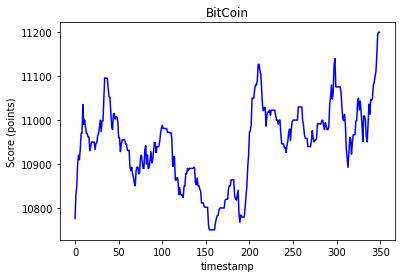

In [3]:
import matplotlib.pyplot as plt
plt.title("BitCoin")
plt.xlabel("timestamp")
plt.ylabel("Score (points)")
plt.plot(prices['close'], 'b')
plt.show()

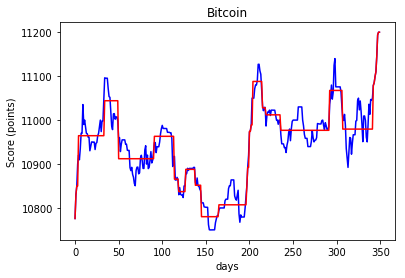

In [10]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

index = np.arange(len(prices)).reshape(-1, 1)
volume = prices['volume'].values.reshape(-1, 1)
X = np.concatenate((index, volume), axis=1)
y = np.array(prices['close'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_reg = DecisionTreeRegressor(max_depth=5)
tree_reg.fit(X_train, y_train)

y_predict = tree_reg.predict(X)
plt.title("Bitcoin")
plt.xlabel("days")
plt.ylabel("Score (points)")
plt.plot(prices['close'], 'b')
plt.plot(y_predict, 'r')
plt.show()

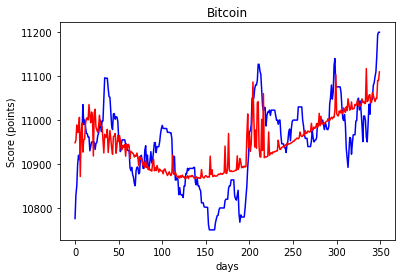

In [9]:
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

index = np.arange(len(prices)).reshape(-1, 1)
volume = prices['volume'].values.reshape(-1, 1)
X_train = np.concatenate((index, volume), axis=1)
y_train = np.array(prices['close'])

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)

regr = linear_model.LinearRegression(normalize=True)
regr.fit(X=X_poly, y=y_train)

y_predict = regr.predict(X_poly)
plt.title("Bitcoin")
plt.xlabel("days")
plt.ylabel("Score (points)")
plt.plot(prices['close'], 'b')
plt.plot(y_predict, 'r')
plt.show()